## Step 1:  Importing the libraries

In [41]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2:Importing dataset

In [45]:
dataset = pd.read_csv('ShopSellData.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , 3].values

In [46]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [47]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [48]:
print(Y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


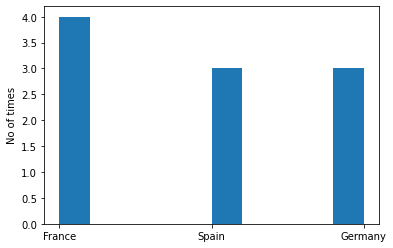

In [49]:
plt.hist(dataset.iloc[ : , :1].values)
plt.ylabel('No of times')
plt.show()

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [51]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


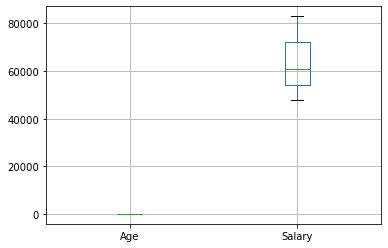

In [52]:
dataset.boxplot()

## Step 3: Handling the missing data

In [53]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [54]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\python37\lib\site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "median")  # , axis = 0)
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])

In [70]:
X

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 61000.0]
 [0 35.0 58000.0]
 [2 38.0 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


## Step 4: Encoding categorical data

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])

### Creating a dummy variable

In [81]:
onehotencoder = OneHotEncoder(categories = [0])
X_l, X_b = X.shape
X = onehotencoder.fit_transform(X.reshape(X_l*X_b)).toarray()
labelencoder_Y = LabelEncoder()
Y =  labelencoder_Y.fit_transform(Y)

ValueError: Expected 2D array, got 1D array instead:
array=[0 44.0 72000.0 2 27.0 48000.0 1 30.0 54000.0 2 38.0 61000.0 1 40.0
 61000.0 0 35.0 58000.0 2 38.0 52000.0 0 48.0 79000.0 1 50.0 83000.0 0
 37.0 67000.0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
Y

## Step 5: Splitting the datasets into training sets and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 100)

## Step 6: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Done :v: 